# **Introduction to Statistics in Python**

[Datacamp course: Introduction to Statistic in Python](https://app.datacamp.com/learn/courses/introduction-to-statistics-in-python)

The study of statistics involves collecting, analyzing, and interpreting data. You can use it to bring the future into focus and infer answers to tons of questions. How many calls will your support team receive, and how many jeans sizes should you manufacture to fit 95% of the population? Statistical skills are developed in this course, which teaches you how to calculate averages, plot relationships between numeric values, and calculate correlations. In addition, you'll learn how to conduct a well-designed study using Python to draw your own conclusions.

Course Takeaways:

* Summary Statistics
* Random Numbers & Probability
* More Distributions and the Central Limit Theorem
* Correlation and Experimental Design

## **How can statistics be used?**

**Statistics - what is it?**

* Statistics is the practice and study of collecting and analyzing data
* A summary statistic is a fact about or a summary of some data

**How can statistics be used?**

* Does a product have a high likelihood of being purchased? People are more likely to purchase the product if they are familiar with it
* Is there an alternative payment system available?
* Can you tell me how many occupants your hotel will have? In what ways can you optimize occupancy?
* To meet the needs of 95% of the population, how many sizes of jeans should be manufactured?
* Can the same number of each size be produced?
* A/B tests: Which advertisement is more effective in motivating the purchase of a product?

### **Types of statistics**

* Descriptive: To describe & summarize data e.g. 25% ride bike, 35% take bus ride & 50% drive to work
* Inferential : Use sample data to make inferences about a larger population e.g. what percent of people drive to work?

### Type of data

* **Numeric (quantitative)**
* Continuous (measured)
    * airplance speed
    * time spent waiting
* Discrete (counted)
    * number of devices
    * number of people

* **Categorical (qualitative)**
* Nominal (unordered)
    * single / married
    * country of residence
* Ordinal (ordered)
    agree, disagree, strongly diagree

### **Measures of center**

In [1]:
import pandas as pd
import numpy as np

In [3]:
food_consumption=pd.read_csv('food_consumption.csv')

In [4]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country']=='Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country']=='USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


In [5]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']=='USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean,np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


**Mean vs Median**

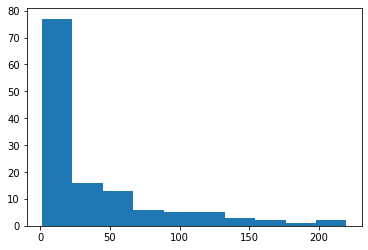

In [8]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']=='rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

In [9]:
# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean,np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


### Measure of spread
* Variance: Average distance from each data point to the data's mean
* Standard Deviation

In [10]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0,1,5)))

# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0,1,6)))

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0,1,11)))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### **Variance and standard deviation**

A variable's variance and standard deviation are two of the most common ways to measure its spread, and you will practice calculating them in this exercise. Spread informs expectations. In other words, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10, they might sell 40 products one day, and one or two the next. Predictions require information like this.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


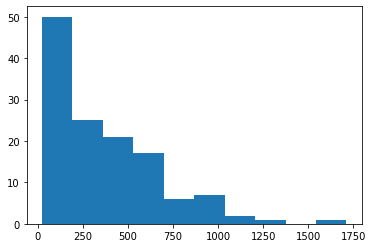

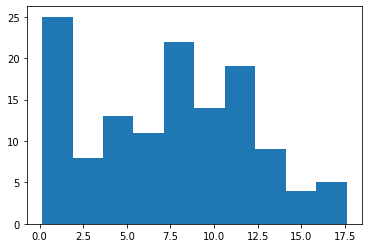

In [11]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var,np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category']=='beef']['co2_emission'])
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category']=='eggs']['co2_emission'])
# Show plot
plt.show()

Finding outliers using IQR

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than Q1−1.5×IQRQ1−1.5×IQR or greater than Q3+1.5×IQRQ3+1.5×IQR, it's considered an outlier.

In [12]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [14]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country > upper) | (emissions_by_country < lower)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## **Random Numbers and Probability**

In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful. Finally, you’ll use the binomial distribution to model events with binary outcomes